# A Simple VAE Implementation on MNIST Dataset

This code is a simple implementation on the MNIST Dataset. It is adapted from a [tutorial by Kurtis Pykes](https://www.datacamp.com/tutorial/variational-autoencoders) on Datacamp

In [ ]:
! pip install torch torchvision matplotlib numpy

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

Define an Encoder class inheriting from nn.Module.

__init__ method of Encoder initializes layers: fc1, fc_mu, fc_logvar.

fc1 is a fully connected layer transforming input_dim to hidden_dim.

fc_mu and fc_logvar are fully connected layers transforming hidden_dim to latent_dim.

forward method of Encoder applies ReLU to fc1 output, then computes mu and logvar.

Define a Decoder class inheriting from nn.Module.

__init__ method of Decoder initializes layers: fc1, fc2.

fc1 is a fully connected layer transforming latent_dim to hidden_dim.

fc2 is a fully connected layer transforming hidden_dim to output_dim.

forward method of Decoder applies ReLU to fc1 output, then sigmoid to fc2 output.

Define a VAE class inheriting from nn.Module.

__init__ method of VAE initializes Encoder and Decoder with given dimensions.

forward method of VAE encodes input x to mu and logvar.

Compute std by exponentiating 0.5 * logvar.

Sample eps from a normal distribution with the same shape as std.

Compute latent variable z as mu + eps * std.

Decode z to reconstruct x_hat.

Return x_hat, mu, and logvar.

In [ ]:
class Encoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(Encoder, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc_mu = nn.Linear(hidden_dim, latent_dim)
        self.fc_logvar = nn.Linear(hidden_dim, latent_dim)

    def forward(self, x):
        h = torch.relu(self.fc1(x))
        mu = self.fc_mu(h)
        logvar = self.fc_logvar(h)
        return mu, logvar
class Decoder(nn.Module):
    def __init__(self, latent_dim, hidden_dim, output_dim):
        super(Decoder, self).__init__()
        self.fc1 = nn.Linear(latent_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, z):
        h = torch.relu(self.fc1(z))
        x_hat = torch.sigmoid(self.fc2(h))
        return x_hat
class VAE(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(VAE, self).__init__()
        self.encoder = Encoder(input_dim, hidden_dim, latent_dim)
        self.decoder = Decoder(latent_dim, hidden_dim, input_dim)

    def forward(self, x):
        mu, logvar = self.encoder(x)
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        z = mu + eps * std
        x_hat = self.decoder(z)
        return x_hat, mu, logvar



Defines a function loss_function with parameters x, x_hat, mu, and logvar.

Computes Binary Cross-Entropy (BCE) loss between x_hat (predicted) and x (actual).

Uses nn.functional.binary_cross_entropy with reduction='sum' to sum the BCE loss.

Computes Kullback-Leibler Divergence (KLD) loss.

KLD is calculated using the formula -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp()).

Returns the sum of BCE and KLD losses.

In [ ]:
def loss_function(x, x_hat, mu, logvar):
    bce = nn.functional.binary_cross_entropy(x_hat, x, reduction='sum')
    kld = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return bce + kld

### Train the VAE on MNIST Dataset

Hyperparameters definition:



input_dim = 784: Input dimension (28x28 images flattened).

hidden_dim = 400: Dimension of the hidden layer.

latent_dim = 20: Dimension of the latent space.

lr = 1e-3: Learning rate for the optimizer.

batch_size = 128: Number of samples per batch.

epochs = 10: Number of training epochs.


In [ ]:
#Hyperparameters

input_dim = 784
hidden_dim = 400
latent_dim = 20
batch_size = 128
num_epochs = 10
learning_rate = 1e-3

Data loader setup:



transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x.view(-1))]):

Convert images to tensors and flatten them.



train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True):

Load MNIST training dataset with transformations.



train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True):

Create data loader for batching and shuffling.

In [ ]:
#Dataloader

transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
#

Model and optimizer initialization:



vae = VAE(input_dim, hidden_dim, latent_dim):

Instantiate the Variational Autoencoder (VAE) model.



optimizer = optim.Adam(vae.parameters(), lr=lr):

Initialize Adam optimizer with model parameters and learning rate.


In [ ]:
#model, optimizer

vae = VAE(input_dim, hidden_dim, latent_dim)
optimizer = optim.Adam(vae.parameters(), lr=learning_rate)

Training loop:



vae.train():

Set the model to training mode.



for epoch in range(epochs)::

Loop over the number of epochs.



train_loss = 0:

Initialize training loss for the epoch.



for x, _ in train_loader::

Loop over batches of data.



x = x.view(-1, input_dim):

Flatten the batch of images.



optimizer.zero_grad():

Reset gradients before backpropagation.



x_hat, mu, logvar = vae(x):

Forward pass through the VAE model.



loss = loss_function(x, x_hat, mu, logvar):

Compute the loss.



loss.backward():

Backpropagate the loss.



train_loss += loss.item():

Accumulate the loss.



optimizer.step():

Update model parameters.



print Epochs and Loss

In [ ]:
# Training Loop

vae.train()
for epoch in range(num_epochs):
  train_loss = 0.0
  for x, _ in train_loader:
    optimizer.zero_grad()
    x = x.view(-1, input_dim)
    optimizer.zero_grad()
    x_hat, mu, logvar = vae(x)
    loss = loss_function(x, x_hat, mu, logvar)
    loss.backward()
    train_loss += loss.item()
    optimizer.step()
  print(f'Epoch {epoch+1}, Loss:{train_loss/len(train_loader.dataset)}')

Epoch 1, Loss:163.09465118815103
Epoch 2, Loss:121.34693543294271
Epoch 3, Loss:114.49010673828126
Epoch 4, Loss:111.46735546875
Epoch 5, Loss:109.76036625976562
Epoch 6, Loss:108.60687788085937
Epoch 7, Loss:107.73319420572916
Epoch 8, Loss:107.13137626953124
Epoch 9, Loss:106.59792125651042
Epoch 10, Loss:106.18735545247395


### Testing and Evaluating The Model


vae.eval(): Set the VAE model to evaluation mode.

with torch.no_grad(): Disable gradient calculation for efficiency.

x, _ = next(iter(train_loader)): Get a batch of data from the train_loader.

x = x.view(-1, input_dim): Flatten the input data to match the input dimensions of the VAE.

x_hat, _, _ = vae(x): Pass the input through the VAE to get the reconstructed output.

x = x.view(-1, 28, 28): Reshape the original input back to 28x28 images.

x_hat = x_hat.view(-1, 28, 28): Reshape the reconstructed output back to 28x28 images.

fig, axs = plt.subplots(2, 10, figsize=(15, 3)): Create a figure with 2 rows and 10 columns of subplots.

for i in range(10):: Loop through the first 10 images.

axs[0, i].imshow(x[i].cpu().numpy(), cmap='gray'): Display the original image in the first row.

axs[1, i].imshow(x_hat[i].cpu().numpy(), cmap='gray'): Display the reconstructed image in the second row.

axs[0, i].axis('off'): Turn off axis for the original image.

axs[1, i].axis('off'): Turn off axis for the reconstructed image.

plt.show(): Display the figure with the original and reconstructed images.

with torch.no_grad(): Disable gradient calculation for efficiency.

z = torch.randn(10, latent_dim): Sample 10 random vectors from the latent space.

sample = vae.decoder(z): Generate samples from the decoder using the random latent vectors.

sample = sample.view(-1, 28, 28): Reshape the generated samples to 28x28 images.

fig, axs = plt.subplots(1, 10, figsize=(15, 3)): Create a figure with 1 row and 10 columns of subplots.

for i in range(10):: Loop through the 10 generated samples.

axs[i].imshow(sample[i].cpu().numpy(), cmap='gray'): Display each generated

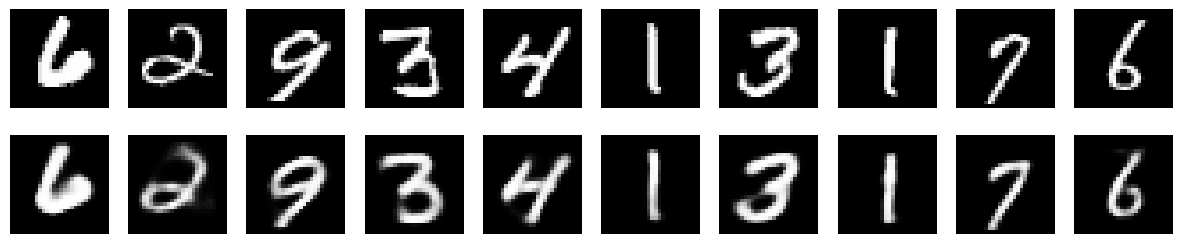

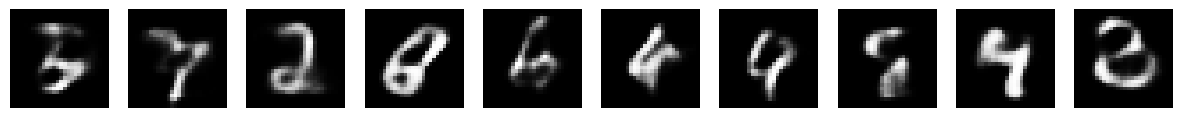

In [ ]:
#visualizing reconstructed outputs

vae.eval()
with torch.no_grad():
    x, _ = next(iter(train_loader))
    x = x.view(-1, input_dim)
    x_hat, _, _ = vae(x)
    x = x.view(-1, 28, 28)
    x_hat = x_hat.view(-1, 28, 28)


    fig, axs = plt.subplots(2, 10, figsize=(15, 3))
    for i in range(10):
        axs[0, i].imshow(x[i].cpu().numpy().squeeze(), cmap='gray')
        axs[1, i].imshow(x_hat[i].cpu().numpy(), cmap='gray')
        axs[0, i].axis('off')
        axs[1, i].axis('off')
    plt.show()

# visualizing generated samples

with torch.no_grad():
    z = torch.randn(10, latent_dim)
    sample = vae.decoder(z)
    sample = sample.view(-1, 28, 28)

    fig, axs = plt.subplots(1, 10, figsize=(15, 3))
    for i in range(10):
        axs[i].imshow(sample[i].cpu().numpy().squeeze(), cmap='gray')
        axs[i].axis('off')
    plt.show()

Visualization of outputs. The top row is the original MNIST data, the middle row is the reconstructed outputs, and the last row is the generated samples